In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [44]:
# Load the dataset
file_path = '/home/raghav/Housing Price/Housing.csv'
housing_data = pd.read_csv(file_path)

# Display basic information and preview data
print(housing_data.info())
print(housing_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

In [45]:
# Step 2: Inspect the dataset
print(housing_data.info())
print(housing_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

In [46]:
# Step 3: Check for missing values
missing_values = housing_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [47]:
# Step 4: Encode categorical variables
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
encoded_data = pd.get_dummies(housing_data, columns=categorical_columns, drop_first=True)
print("Encoded data sample:\n", encoded_data.head())

Encoded data sample:
       price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnish

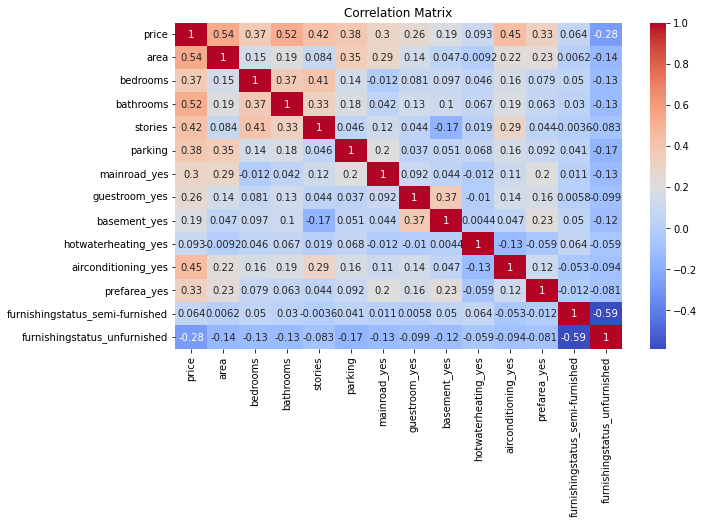

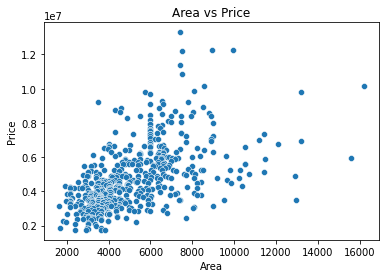

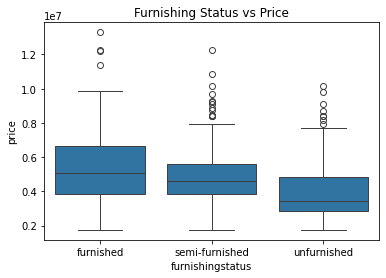

In [48]:
# Step 5: Visualize relationships between variables
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot: Area vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='price', data=housing_data)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Boxplot: Furnishing Status vs Price
plt.figure(figsize=(6, 4))
sns.boxplot(x='furnishingstatus', y='price', data=housing_data)
plt.title('Furnishing Status vs Price')
plt.show()


In [49]:
# Step 6: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
encoded_data[numerical_features] = scaler.fit_transform(encoded_data[numerical_features])

print("Scaled data sample:\n", encoded_data.head())


Scaled data sample:
       price      area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  13300000  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  12250000  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  12250000  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  12215000  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  11410000  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-fu

In [50]:
# Step 7: Split data into train and test sets
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (436, 13), Test Set: (109, 13)


In [51]:
# Step 8: Train and evaluate a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1754318687330.6682
R2 Score: 0.6529242642153175


In [52]:
# Step 9: Save the processed data
processed_file_path = '/home/raghav/housing price/Processed_Housing.csv'
encoded_data.to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")

Processed data saved to /home/raghav/housing price/Processed_Housing.csv


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Random Forest Results:
Mean Absolute Error: 1017470.6224770641
Mean Squared Error: 1959406221695.9854
R² Score: 0.6123495913214113


In [54]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, 

[CV] END max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_split=10, n_estimators=300; total time=   0.4s
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


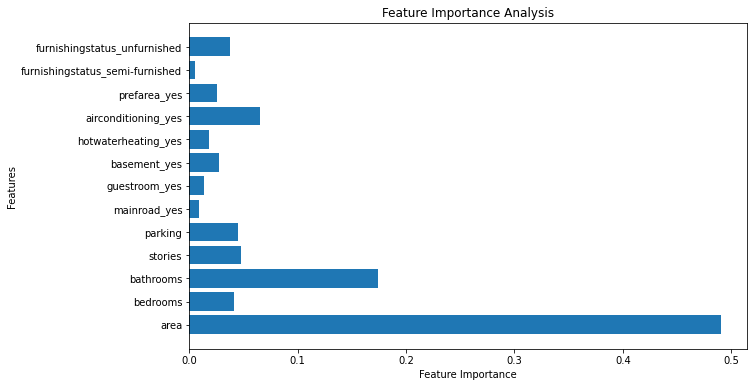

In [55]:
import matplotlib.pyplot as plt

# Feature importances
importances = best_rf_model.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


In [56]:
import joblib

# Save the model
joblib.dump(best_rf_model, '/home/raghav/housing price/house_price_model.pkl')
print("Model saved successfully.")


Model saved successfully.
